<a href="https://colab.research.google.com/github/erikcontena/NN_prediksi_kamar_rapi_atau_tidak/blob/master/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**membuat sebuah model untuk mengklasifikasi gambar sebuah kamar dan memprediksi apakah kamar tersebut rapi atau berantakan.**

Untuk dataset yang kita gunakan memiliki 200 buah sampel untuk data latih. Terdapat 100 sampel gambar ruangan rapi dan 100 sampel gambar ruangan berantakan.

mengimpor semua library yang dibutuhkan.

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Kemudian pastikan versi TensorFlow adalah versi 2 ke atas.

In [ ]:
    print(tf.__version__)

2.3.0


dowload data dari link

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-09-08 15:50:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  8.59MB/s    in 12s     

2020-09-08 15:50:35 (5.52 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



mengekstraksi data yang sebelumnya kita unduh. Lalu kita mendefinisikan nama direktori untuk data latih dan data validasi.

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
 

Kita dapat melihat struktur data yang telah kita unduh. Dapat Anda lihat bahwa pada direktori data latih dan data validasi masing-masing memiliki sub-direktori clean dan messy. Setiap sub-direktori menyimpan gambar yang sesuai dengan nama sub-direktori tersebut. Jadi, pada sub-direktori ‘clean’ terdapat gambar-gambar ruangan yang rapi dan pada sub-direktori ‘messy’ terdapat gambar-gambar ruangan yang berantakan.

In [ ]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [ ]:
os.listdir('/tmp/images/val')

['messy', 'clean']

membuat sub direktori untuk setiap kelas pada direktori latih dan direktori validasi. Pembuatan direktori di sini akan dipakai saat menggunakan objek image data generator

In [ ]:
#  membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

membuat sebuah objek ImageDataGenerator untuk data training dan data testing. Image data generator adalah sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing yang akan diberikan ke model. Beberapa kemudahan yang disediakan Image data generator adalah, preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.

Kode di bawah menunjukkan proses augmentasi gambar pada setiap sampel di dataset. Augmentasi gambar adalah teknik untuk menciptakan data-data baru dari data yang telah ada. Contoh augmentasi gambar adalah horizontal flip di mana gambar akan dibalikkan secara horizontal.

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model.

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Setelah data telah siap, kita bisa membangun arsitektur sebuah CNN.

fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar. Sedangkan layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan MLP lebih cepat.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Setelah membuat arsitektur dari CNN, jangan lupa untuk memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer.

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Setelah menentukan loss function dan optimizer pada CNN, kita dapat melatih model kita menggunakan metode fit. Dengan menggunakan image data generator, kita tidak perlu memasukkan parameter gambar dan labelnya. Image data generator secara otomatis melabeli sebuah gambar sesuai dengan direktori di mana ia disimpan. Contohnya sebuah gambar yang terdapat di direktori clean, secara otomatis akan diberi label “clean” oleh image data generator.

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2 #menampilkan proses training
)

Epoch 1/20
25/25 - 6s - loss: 0.7273 - accuracy: 0.5200 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6949 - accuracy: 0.5400 - val_loss: 0.6867 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6668 - accuracy: 0.5400 - val_loss: 0.6372 - val_accuracy: 0.5500
Epoch 4/20
25/25 - 6s - loss: 0.7146 - accuracy: 0.5400 - val_loss: 0.6503 - val_accuracy: 0.7000
Epoch 5/20
25/25 - 6s - loss: 0.6489 - accuracy: 0.7000 - val_loss: 0.9175 - val_accuracy: 0.5500
Epoch 6/20
25/25 - 6s - loss: 0.6789 - accuracy: 0.5400 - val_loss: 0.6882 - val_accuracy: 0.6500
Epoch 7/20
25/25 - 6s - loss: 0.6694 - accuracy: 0.6700 - val_loss: 0.6253 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 6s - loss: 0.5945 - accuracy: 0.7800 - val_loss: 0.6813 - val_accuracy: 0.5500
Epoch 9/20
25/25 - 6s - loss: 0.6425 - accuracy: 0.7200 - val_loss: 0.5402 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 6s - loss: 0.6011 - accuracy: 0.7400 - val_loss: 0.5326 - val_accuracy: 0.7000
Epoch 11/20
25/25 -

Terakhir kita dapat langsung melihat hasil dari model yang telah kita buat. Kode di bawah memungkinkan kita untuk secara interaktif memilih sebuah berkas gambar, kemudian melakukan resize gambar dan mengubahnya menjadi larik numpy. Prediksi dari model kita:

. Silakan foto kamar Anda sendiri dan lihat hasil prediksi dari model yang telah Anda buat.

Saving WIN_20200518_18_09_08_Pro.jpg to WIN_20200518_18_09_08_Pro (1).jpg
WIN_20200518_18_09_08_Pro.jpg
clean


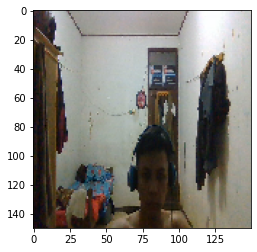

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')